## Contents
    1. Importing libraries and data
    2. Data cleaning
       a. Finding and addressing duplicate rows
       b. Finding and addressing irrelevant values
       c. Finding and addressing outliers
       d. Additional changes to load data into SQL
    3. Exporting data

# 01. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data
path=r'C:\Users\munav\Desktop\bootcamps\Projects\Playstore Project\02. Data'
df=pd.read_csv(os.path.join(path, 'Original Data', 'playstore_apps.csv'))

In [3]:
#checking the imported data
df.shape

(10841, 13)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FML F*ck my life + widget,FAMILY,4.2,1415.0,209k,100000.0,Free,0.0,Everyone,Entertainment,5/21/2010,3.1,1.5 and up
1,CONTRACT KILLER: ZOMBIES,GAME,4.4,144545.0,13M,5000000.0,Free,0.0,Teen,Action,1/12/2011,1.1.0,2.1 and up
2,CJ Poker Odds Calculator,GAME,4.1,207.0,116k,50000.0,Free,0.0,Everyone,Card,1/30/2011,1.2,1.6 and up
3,Band O'Clock,LIFESTYLE,3.8,1140.0,746k,100000.0,Free,0.0,Everyone,Lifestyle,3/12/2011,0.11,2.1 and up
4,FD Shift Calendar Widget,TOOLS,4.1,981.0,73k,100000.0,Free,0.0,Everyone,Tools,3/16/2011,1.2.4,1.6 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Soccer 2018,SPORTS,3.5,172373.0,47M,10000000.0,Free,0.0,Everyone,Sports,12/7/2018,1.3,4.3 and up
10837,Curso Básico y Avanzado la Fe de Jesús Audio-T...,FAMILY,NaN,0.0,11M,10.0,Free,0.0,Everyone 10+,Education,12/7/2018,1,4.0 and up
10838,Crazy Bike attack Racing New: motorcycle racing,GAME,4.2,20364.0,45M,5000000.0,Free,0.0,Everyone,Racing,12/7/2018,1.2.1,4.1 and up
10839,FK Željezni?ar,SPORTS,4.9,1420.0,20M,10000.0,Free,0.0,Everyone,Sports,12/7/2018,2.5.0,4.2 and up
10840,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,11-Feb-18,NaN,4.0 and up,NaN


In [6]:
df.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,1.546434e+07,1.027368
std,0.537431,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


# 02. Data cleaning

### a. Finding and addressing duplicate rows


In [7]:
#Finding duplicate values
df_dups = df[df.duplicated(subset=['App'], keep='last')]
df_dups.shape

(1181, 13)

In [8]:
df_dups.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
68,AnatomyMapp,MEDICAL,4.1,80.0,48M,5000.0,Paid,14.99,Everyone,Medical,5/11/2013,1,3.0 and up
75,Bita and the Animals - Pelos Ares,FAMILY,4.4,1160.0,37M,100000.0,Free,0.00,Everyone,Education;Music & Video,5/22/2013,1,2.2 and up
210,Chictopia,LIFESTYLE,4.1,360.0,4.6M,10000.0,Free,0.00,Everyone,Lifestyle,4/30/2014,1.6.2,2.2 and up
251,Essential Anatomy 3,MEDICAL,4.1,1533.0,42M,50000.0,Paid,11.99,Mature 17+,Medical,7/8/2014,1.1.3,4.0.3 and up
282,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396.0,9.5M,50000.0,Paid,3.99,Everyone,Casual;Pretend Play,9/12/2014,1.8,4.0 and up


In [9]:
#Dropping duplicate values
df=df.drop_duplicates(subset=['App'],keep=False)

In [10]:
df.shape

(8862, 13)

### b. Finding and addressing irrelevant values

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FML F*ck my life + widget,FAMILY,4.2,1415.0,209k,100000.0,Free,0.0,Everyone,Entertainment,5/21/2010,3.1,1.5 and up
1,CONTRACT KILLER: ZOMBIES,GAME,4.4,144545.0,13M,5000000.0,Free,0.0,Teen,Action,1/12/2011,1.1.0,2.1 and up
2,CJ Poker Odds Calculator,GAME,4.1,207.0,116k,50000.0,Free,0.0,Everyone,Card,1/30/2011,1.2,1.6 and up
3,Band O'Clock,LIFESTYLE,3.8,1140.0,746k,100000.0,Free,0.0,Everyone,Lifestyle,3/12/2011,0.11,2.1 and up
4,FD Shift Calendar Widget,TOOLS,4.1,981.0,73k,100000.0,Free,0.0,Everyone,Tools,3/16/2011,1.2.4,1.6 and up


In [12]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Soccer 2018,SPORTS,3.5,172373.0,47M,10000000.0,Free,0.0,Everyone,Sports,12/7/2018,1.3,4.3 and up
10837,Curso Básico y Avanzado la Fe de Jesús Audio-T...,FAMILY,NaN,0.0,11M,10.0,Free,0.0,Everyone 10+,Education,12/7/2018,1,4.0 and up
10838,Crazy Bike attack Racing New: motorcycle racing,GAME,4.2,20364.0,45M,5000000.0,Free,0.0,Everyone,Racing,12/7/2018,1.2.1,4.1 and up
10839,FK Željezni?ar,SPORTS,4.9,1420.0,20M,10000.0,Free,0.0,Everyone,Sports,12/7/2018,2.5.0,4.2 and up
10840,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,11-Feb-18,NaN,4.0 and up,NaN


In [13]:
#Removing speical characters from App column
df['App']=df['App'].str.replace('[^a-zA-Z0-9\s]', '')

C:\Users\munav\AppData\Local\Temp\ipykernel_8616\3031708016.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['App']=df['App'].str.replace('[^\w\s]', '')


In [14]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Soccer 2018,SPORTS,3.5,172373.0,47M,10000000.0,Free,0.0,Everyone,Sports,12/7/2018,1.3,4.3 and up
10837,Curso Básico y Avanzado la Fe de Jesús AudioTexto,FAMILY,NaN,0.0,11M,10.0,Free,0.0,Everyone 10+,Education,12/7/2018,1,4.0 and up
10838,Crazy Bike attack Racing New motorcycle racing,GAME,4.2,20364.0,45M,5000000.0,Free,0.0,Everyone,Racing,12/7/2018,1.2.1,4.1 and up
10839,FK Željezniar,SPORTS,4.9,1420.0,20M,10000.0,Free,0.0,Everyone,Sports,12/7/2018,2.5.0,4.2 and up
10840,Life Made WIFi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,11-Feb-18,NaN,4.0 and up,NaN


In [15]:
#Finding unique values in category column
print(df['Category'].unique())

['FAMILY' 'GAME' 'LIFESTYLE' 'TOOLS' 'LIBRARIES_AND_DEMO'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMMUNICATION' 'HEALTH_AND_FITNESS'
 'FINANCE' 'MEDICAL' 'PRODUCTIVITY' 'SHOPPING' 'PHOTOGRAPHY'
 'PERSONALIZATION' 'SPORTS' 'EDUCATION' 'MAPS_AND_NAVIGATION'
 'VIDEO_PLAYERS' 'HOUSE_AND_HOME' 'SOCIAL' 'TRAVEL_AND_LOCAL' 'WEATHER'
 'NEWS_AND_MAGAZINES' 'AUTO_AND_VEHICLES' 'ENTERTAINMENT' 'COMICS'
 'PARENTING' 'EVENTS' 'FOOD_AND_DRINK' 'BEAUTY' 'DATING' 'ART_AND_DESIGN'
 '1.9']


In [16]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10840,Life Made WIFi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,11-Feb-18,NaN,4.0 and up,NaN


#### The '1.9' in the Category column seems irrelavant and does not comply with the data type of the column, so we will drop it.

In [17]:
df=df.drop(index=10840)
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
#Check if irrelevant values are removed
print(df['Category'].unique())

['FAMILY' 'GAME' 'LIFESTYLE' 'TOOLS' 'LIBRARIES_AND_DEMO'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMMUNICATION' 'HEALTH_AND_FITNESS'
 'FINANCE' 'MEDICAL' 'PRODUCTIVITY' 'SHOPPING' 'PHOTOGRAPHY'
 'PERSONALIZATION' 'SPORTS' 'EDUCATION' 'MAPS_AND_NAVIGATION'
 'VIDEO_PLAYERS' 'HOUSE_AND_HOME' 'SOCIAL' 'TRAVEL_AND_LOCAL' 'WEATHER'
 'NEWS_AND_MAGAZINES' 'AUTO_AND_VEHICLES' 'ENTERTAINMENT' 'COMICS'
 'PARENTING' 'EVENTS' 'FOOD_AND_DRINK' 'BEAUTY' 'DATING' 'ART_AND_DESIGN']


In [19]:
df['Category'].value_counts(dropna=False)

FAMILY                 1790
GAME                    851
TOOLS                   814
BUSINESS                386
PERSONALIZATION         363
LIFESTYLE               357
PRODUCTIVITY            341
MEDICAL                 334
FINANCE                 328
SPORTS                  298
COMMUNICATION           272
HEALTH_AND_FITNESS      246
PHOTOGRAPHY             244
NEWS_AND_MAGAZINES      234
BOOKS_AND_REFERENCE     213
SOCIAL                  200
TRAVEL_AND_LOCAL        195
SHOPPING                166
VIDEO_PLAYERS           153
MAPS_AND_NAVIGATION     125
DATING                  116
FOOD_AND_DRINK           98
AUTO_AND_VEHICLES        85
EDUCATION                84
LIBRARIES_AND_DEMO       83
WEATHER                  76
EVENTS                   64
HOUSE_AND_HOME           61
PARENTING                60
ART_AND_DESIGN           60
ENTERTAINMENT            59
BEAUTY                   53
COMICS                   52
Name: Category, dtype: int64

In [20]:
#Finding unique values in rating column
print(df['Rating'].unique())

[4.2 4.4 4.1 3.8 4.  3.6 4.6 4.5 3.3 3.7 3.9 3.1 nan 3.5 4.3 1.  3.  4.7
 3.2 5.  3.4 2.5 4.8 1.9 2.4 2.7 2.3 4.9 1.7 2.9 2.8 2.6 1.8 1.6 2.1 2.
 1.4 2.2 1.5 1.2]


#### It seems like there isn't any irrelevant values in rating column, but there are some misssing values which will be addressed in further steps.

In [21]:
#Finding unique values in rating column
print(df['Reviews'].unique())

[1.41500e+03 1.44545e+05 2.07000e+02 ... 2.64282e+05 1.72373e+05
 2.03640e+04]


In [22]:
#Suppressing scientific notation and resetting display options
np.set_printoptions(suppress=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)

In [23]:
#Finding unique values in rating column
print(df['Reviews'].unique())

[    1415.   144545.      207.     1140.      981.      387.      215.
      159.      142.     7750.      236.     9636.    31621.    38767.
        7.       12.   126862.       49.     1186.        0.       24.
     2885.     1092.      913.      534.       91.    12906.    83977.
    29330.      269.     1218.        1.     1696.     2412.      272.
      214.      440.     3396.        3.      580.       18.   206602.
      926.      433.       30.       93.       41.       64.      275.
       66.        2.       89.       15.     2132.      294.      134.
    35572.       51.      634.       54.      768.     1450.     1091.
       71.     1143.       17.    67007.      289.      279.    54221.
      137.       48.       14.     2362.     1236.   407788.       39.
     4207.    28728.      143.      649.      249.     1034.       31.
        4.      363.   576210.     1436.       70.       38.        6.
     1320.   314774.       78.      164.       21.      438.        8.
     7

#### There doesn't seem to be irrelevant values in Reviews column, but we will make sure that all the rows contain number by checking the data type of each column. We will also check for mized data types.

In [24]:
#checking the data type of each column
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
#Finding mixed data column
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

Type
Current Ver
Android Ver


#### We can now verify that the columns Rating, Reviews, Installs and Price contain only float values. 

In [26]:
#Finding unique values in size column
print(df['Size'].unique())

['209k' '13M' '116k' '746k' '73k' '1.1M' '2.6M' '29k' '26k' '292k' '221k'
 '93k' '208k' '4.1M' '81k' '39k' '72k' '624k' '51k' '6.4M' '1020k' '44k'
 'Varies with device' '190k' '70k' '14M' '335k' '8.5M' '11M' '6.9M' '647k'
 '1.0M' '2.2M' '2.0M' '2.7M' '192k' '785k' '899k' '9.1M' '266k' '2.1M'
 '7.6M' '318k' '1.2M' '924k' '353k' '1.3M' '2.3M' '5.2M' '939k' '842k'
 '164k' '103k' '153k' '45k' '259k' '186k' '14k' '1.4M' '775k' '9.7M' '45M'
 '1.9M' '642k' '15M' '5.1M' '232k' '963k' '47M' '400k' '58k' '754k' '25M'
 '33k' '19M' '32M' '986k' '2.8M' '240k' '837k' '626k' '196k' '592k' '4.2M'
 '33M' '257k' '172k' '48M' '20k' '3.5M' '655k' '881k' '89k' '778k' '43M'
 '322k' '376k' '17k' '26M' '749k' '201k' '2.9M' '720k' '288k' '6.1M'
 '234k' '34M' '597k' '10M' '12M' '3.3M' '4.7M' '942k' '11k' '226k' '317k'
 '91k' '38M' '902k' '853k' '23M' '50k' '108k' '42M' '97k' '44M' '20M'
 '39M' '16M' '8.7M' '50M' '27M' '582k' '1.5M' '663k' '4.9M' '245k' '4.5M'
 '293k' '270k' '4.0M' '862k' '1.8M' '903k' '383k' '6

#### There doesn't seem to be any irrelevant values in Size column

In [27]:
#Finding unique values in type column
print(df['Type'].unique())

['Free' 'Paid' nan]


In [28]:
#Checking if the rows in Type column containing missing values have some value in Price column
df_missing=df[df['Type'].isnull()]
df_missing['Price'].value_counts(dropna=False)

0.0    1
Name: Price, dtype: int64

In [29]:
#We can see that the missing value in Type column has 0.0 Price, so we can replaced it with 'Free'
df.loc[df['Type'].isnull(), 'Type']='Free'

In [30]:
#Checking if missing value was replaced
print(df['Type'].unique())

['Free' 'Paid']


In [31]:
#Finding unique values in price column
print(df['Price'].unique())

[  0.     1.49   1.     4.99   1.04   2.99   1.26   2.     9.99   0.99
   2.56   3.99   2.49   1.99   1.29   3.88   4.85   5.     6.99  29.99
   4.84   6.49  14.99   2.6   19.99   1.5    1.96   5.49   5.99  16.99
   1.97   4.8   15.46   3.49 200.     1.75   1.7   39.99   4.49  17.99
   1.61   8.99   4.29  46.99   3.08   3.04   4.59   3.61  10.99   8.49
   4.6   10.    19.9  399.99   7.99  12.99  89.99   1.76  13.99   2.59
  37.99   3.28 109.99  14.     7.49  19.4  154.99   3.02 379.99   4.77
  15.99   2.9    2.5   18.99   2.95 400.    11.99   1.2    3.9   25.99
 389.99  74.99 299.99   1.59  30.99 394.99  28.99]


In [32]:
#Finding unique values in content rating column
print(df['Content Rating'].unique())


['Everyone' 'Teen' 'Everyone 10+' 'Unrated' 'Mature 17+' 'Adults only 18+']


In [33]:
#Finding unique values in genres column
print(df['Genres'].unique())

['Entertainment' 'Action' 'Card' 'Lifestyle' 'Tools' 'Puzzle'
 'Libraries & Demo' 'Books & Reference' 'Business' 'Communication'
 'Education' 'Health & Fitness' 'Finance' 'Medical' 'Casual'
 'Productivity' 'Shopping' 'Arcade' 'Photography' 'Personalization'
 'Sports' 'Board' 'Maps & Navigation' 'Video Players & Editors'
 'House & Home' 'Education;Pretend Play' 'Social' 'Racing'
 'Travel & Local' 'Adventure' 'Weather' 'Word' 'Education;Education'
 'News & Magazines' 'Simulation' 'Role Playing' 'Strategy'
 'Educational;Education' 'Arcade;Action & Adventure' 'Casino'
 'Auto & Vehicles' 'Trivia' 'Casual;Pretend Play' 'Board;Pretend Play'
 'Educational;Creativity' 'Casual;Education' 'Racing;Action & Adventure'
 'Comics' 'Tools;Education' 'Board;Brain Games'
 'Adventure;Action & Adventure' 'Health & Fitness;Education' 'Educational'
 'Educational;Pretend Play' 'Simulation;Action & Adventure'
 'Role Playing;Action & Adventure' 'Action;Action & Adventure'
 'Casual;Action & Adventure' 'Music & A

In [34]:
#Finding unique values in Last Updated column
print(df['Last Updated'].unique())

['5/21/2010' '1/12/2011' '1/30/2011' '3/12/2011' '3/16/2011' '4/16/2011'
 '4/18/2011' '6/23/2011' '6/26/2011' '6/29/2011' '9/20/2011' '9/22/2011'
 '10/7/2011' '11/4/2011' '12/5/2011' '12/10/2011' '1/6/2012' '1/17/2012'
 '1/18/2012' '2/27/2012' '6/2/2012' '6/17/2012' '6/19/2012' '6/27/2012'
 '7/20/2012' '7/30/2012' '8/2/2012' '8/10/2012' '8/11/2012' '8/17/2012'
 '8/18/2012' '8/24/2012' '9/4/2012' '9/19/2012' '9/27/2012' '11/11/2012'
 '11/22/2012' '11/26/2012' '11/28/2012' '12/1/2012' '12/19/2012'
 '1/7/2013' '1/8/2013' '1/10/2013' '1/11/2013' '1/25/2013' '2/5/2013'
 '2/6/2013' '2/12/2013' '2/15/2013' '2/18/2013' '2/22/2013' '3/2/2013'
 '3/7/2013' '4/6/2013' '4/9/2013' '4/10/2013' '4/22/2013' '4/25/2013'
 '5/4/2013' '5/6/2013' '5/9/2013' '5/11/2013' '5/12/2013' '5/14/2013'
 '5/18/2013' '5/21/2013' '5/25/2013' '6/3/2013' '6/5/2013' '6/15/2013'
 '6/25/2013' '6/26/2013' '7/8/2013' '7/10/2013' '7/17/2013' '7/18/2013'
 '7/20/2013' '7/26/2013' '7/27/2013' '7/31/2013' '8/8/2013' '8/9/2013'
 '8/

In [35]:
#Finding unique values in Current Ver column
print(df['Current Ver'].unique())

['3.1' '1.1.0' '1.2' '0.11' '1.2.4' '1.3.3' '1' '1.1' '1.0.0' '1.6' '2.4'
 '2.0.1' '1.4.3' '1.2.0' '2.00.00' '0.59' '1.3' 'Varies with device'
 '2.3.3' '1.01' '1.2.2' '1.0.9' '4.0.1' '1.4' '0.1.8 beta' '1.1.6' '2.5'
 '1.0.6' '3' '1.0.3' '3.1.0' '1.5' '1.1.11' '2.0.0' '2.9' '4.1' '2.3'
 '1.0.12' '2.1.0.9' '1.11' '1.0.16' '1.0.2' '1.0.1' '2.4.3' '3.4.0'
 '1.3.1' '1.3.3.9' '1.0.013' '2' '1.48' '1.05' '3.25.3' '3.8.2' '1.08'
 '0.5.2 beta' '2.1.3' '0.6.11' '3.0.3' '1.13' '1.0beta' '1.2.10' '1.95'
 nan '2.0.131112' '1.1.2' '3.2' '2.41' '4.3.1' '1.02' '81' '1.7' '2.4.4'
 '2014.01' '5' '1.85' '2.2.1' '6' '2.03' '2.4.0' '2.3.5' '2.1' '3.4' '0.8'
 '3.5.6' '1.2.9' '1.03' '9.7.753080' '0.6.0' '1.0.19' '1.7.3'
 'v1.9.6 beta 1' '1.3.140606' '1.1.0.0' '3.0.0' '1.77' '3.0.4' '2.46'
 '2.47' '2.08' '2.1.5' '1.2.5' '3.1.7' '2.8' '4.7' '1.1.5' '1.0.28' '2.2'
 '1.9' 'v3' '1.5.2' '1.5.140718' '2.4.2' '1.0.4' 'Android 2.0 - 2014'
 '1.3.0' '1.2.6' '1.1.06' '1.2.1' '1.8 (2014-10-10 11:10:51 +0400)' '5.3'
 '1.8

In [36]:
#Finding unique values in Android Ver column
print(df['Android Ver'].unique())

['1.5 and up' '2.1 and up' '1.6 and up' '2.0 and up' '2.2 and up'
 '2.3.3 and up' '3.0 and up' 'Varies with device' '2.0.1 and up'
 '2.3 and up' '3.2 and up' '3.1 and up' '4.0 and up' '4.2 and up'
 '4.0.3 and up' '4.1 and up' '1.0 and up' '4.3 and up' '4.4 and up'
 '5.0 and up' '5.1 and up' '4.4W and up' '6.0 and up' '5.0 - 6.0'
 '5.0 - 8.0' '7.0 and up' '4.1 - 7.1.1' '2.2 - 7.1.1' '7.1 and up'
 '8.0 and up' nan '4.0.3 - 7.1.1' '7.0 - 7.1.1' '5.0 - 7.1.1']


#### It seems like all the other columns don't have any irrelevant values. There might be irrelevant values in Current version column, but this column will not be necessary for SQL queries so there's no point in deleting data based on this column.

### c. Finding and addressing outliers

<AxesSubplot:xlabel='Reviews', ylabel='Count'>

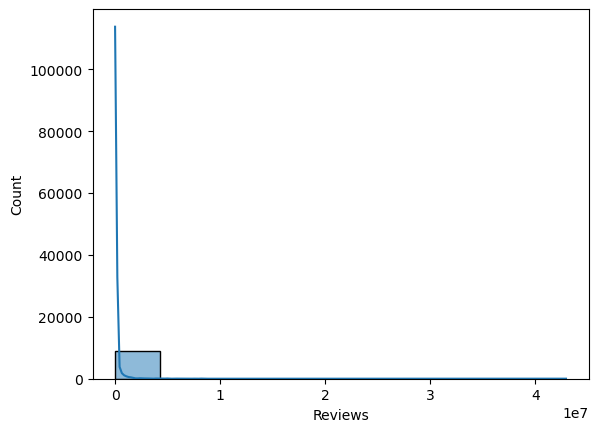

In [37]:
#Checking for outliers in reviews column
sns.histplot(df['Reviews'], bins = 10, kde = True)

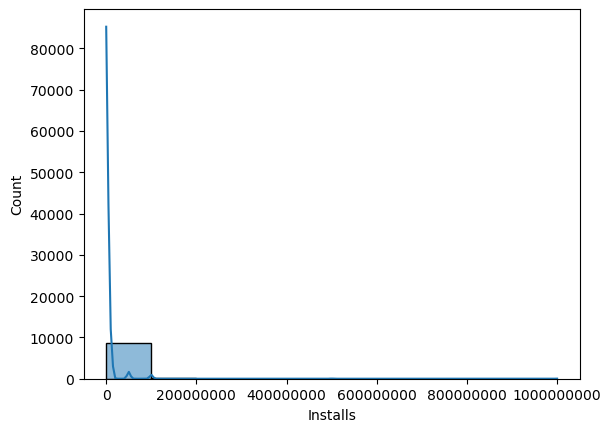

In [38]:
#Checking for outliers in installs column
sns.histplot(df['Installs'], bins = 10, kde = True)
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Count'>

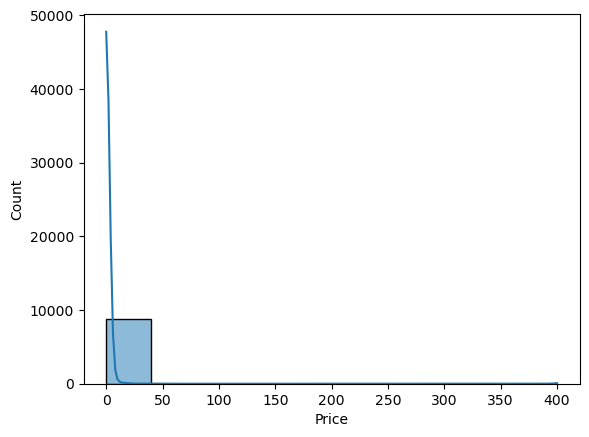

In [39]:
#Checking for outliers in price column
sns.histplot(df['Price'], bins = 10, kde = True)

#### There doesn't seem to be any irrelevant (negative or extremely high values which couldn't have been valid) values in the columns above.

### d. Additional changes to load data into SQL

In [40]:
#Renaming columns
df=df.rename(columns={'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver', 'Android Ver':'Android_Ver', 'Content Rating':'Content_Rating'})
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,FML Fck my life widget,FAMILY,4.2,1415.0,209k,100000.0,Free,0.0,Everyone,Entertainment,5/21/2010,3.1,1.5 and up
1,CONTRACT KILLER ZOMBIES,GAME,4.4,144545.0,13M,5000000.0,Free,0.0,Teen,Action,1/12/2011,1.1.0,2.1 and up
2,CJ Poker Odds Calculator,GAME,4.1,207.0,116k,50000.0,Free,0.0,Everyone,Card,1/30/2011,1.2,1.6 and up
3,Band OClock,LIFESTYLE,3.8,1140.0,746k,100000.0,Free,0.0,Everyone,Lifestyle,3/12/2011,0.11,2.1 and up
4,FD Shift Calendar Widget,TOOLS,4.1,981.0,73k,100000.0,Free,0.0,Everyone,Tools,3/16/2011,1.2.4,1.6 and up


In [41]:
#Replacing missing values in Rating column with 0
df['Rating']=df['Rating'].fillna(0)
df['Rating'].value_counts(dropna=False)

0.0    1454
4.3     776
4.4     768
4.5     729
4.2     717
4.6     588
4.1     555
4.0     473
4.7     404
3.9     339
3.8     272
5.0     268
3.7     212
4.8     209
3.6     160
3.5     149
3.4     124
3.3      98
4.9      84
3.0      79
3.1      69
3.2      62
2.9      45
2.8      39
2.6      22
2.7      21
2.3      20
2.4      19
2.5      19
1.0      16
2.2      14
2.0      12
1.9      10
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [42]:
#Replacing missing values in Current_Ver column with NaN
df['Current_Ver']=df['Current_Ver'].replace(np.nan,'NaN')
df['Current_Ver'].value_counts(dropna=False)

1                                                     821
Varies with device                                    808
1.1                                                   268
1.2                                                   181
2                                                     162
1.3                                                   136
1.0.0                                                 130
1.0.1                                                 112
1.4                                                    89
1.5                                                    82
1.0.2                                                  77
1.6                                                    64
3                                                      64
2.1                                                    63
1.0.3                                                  60
1.7                                                    54
1.0.4                                                  54
1.1.0         

In [43]:
#Removing columns with missing values
df=df.dropna(subset=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated','Android_Ver'])
df.shape

(8859, 13)

In [44]:
#Checking for other missing values 
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

# 03. Exporting data

In [45]:
df.to_csv(os.path.join(path, 'Prepared Data', 'Playstore_apps_clean.csv'))